In [117]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import math
import matplotlib.pyplot as plt

# Zdefiniowanie zmiennych wejściowych i wyjściowej oraz ich zakresów
a = ctrl.Antecedent(np.arange(0, 91, 1), 'kąt rzutu')
d = ctrl.Antecedent(np.arange(0, 101, 1), 'zasięg rzutu')
k = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'współczynnik oporu powietrza')
m = ctrl.Antecedent(np.arange(0, 101, 1), 'masa ciała')
v0 = ctrl.Consequent(np.arange(0, 101, 1), 'prędkość początkowa')

# Zmiana funkcji przynależności dla "kąta rzutu" na funkcje gaussowskie
a['niski'] = fuzz.gaussmf(a.universe, 0, 20)
a['średni'] = fuzz.gaussmf(a.universe, 45, 20)
a['wysoki'] = fuzz.gaussmf(a.universe, 90, 20)

d.automf(3, names=['bliski', 'średni', 'daleki'])

k['niski'] = fuzz.trimf(k.universe, [0, 0, 0.5])
k['wysoki'] = fuzz.trimf(k.universe, [0, 0.5, 1])

m['niska'] = fuzz.trimf(m.universe, [0, 0, 50])
m['wysoka'] = fuzz.trimf(m.universe, [0, 50, 100])

v0['niska'] = fuzz.trimf(v0.universe, [0, 0, 50])
v0['średnia'] = fuzz.trimf(v0.universe, [0, 50, 100])
v0['wysoka'] = fuzz.trimf(v0.universe, [50, 100, 100])

# Definicja reguł rozmytych
rule1 = ctrl.Rule(a['niski'] & d['bliski'] & k['niski'] & m['niska'], v0['wysoka'])
rule2 = ctrl.Rule(a['niski'] & d['bliski'] & k['wysoki'] & m['wysoka'], v0['niska'])
rule3 = ctrl.Rule(a['średni'] & d['daleki'] & k['niski'] & m['niska'], v0['średnia'])
rule4 = ctrl.Rule(a['średni'] & d['daleki'] & k['wysoki'] & m['wysoka'], v0['średnia'])
rule5 = ctrl.Rule(a['wysoki'] & d['bliski'] & k['niski'] & m['niska'], v0['wysoka'])
rule6 = ctrl.Rule(a['wysoki'] & d['bliski'] & k['wysoki'] & m['wysoka'], v0['niska'])
rule7 = ctrl.Rule(a['niski'] & d['średni'] & k['niski'] & m['niska'], v0['średnia'])
rule8 = ctrl.Rule(a['niski'] & d['daleki'] & k['wysoki'] & m['wysoka'], v0['niska'])
rule9 = ctrl.Rule(a['średni'] & d['bliski'] & k['niski'] & m['niska'], v0['średnia'])
rule10 = ctrl.Rule(a['średni'] & d['bliski'] & k['wysoki'] & m['wysoka'], v0['niska'])
rule11 = ctrl.Rule(a['wysoki'] & d['średni'] & k['niski'] & m['niska'], v0['średnia'])
rule12 = ctrl.Rule(a['wysoki'] & d['średni'] & k['wysoki'] & m['wysoka'], v0['niska'])

# Utworzenie systemu sterowania i dodanie reguł
velocity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
velocity_estimate = ctrl.ControlSystemSimulation(velocity_ctrl)

# Symulacja działania modelu dla konkretnych wartości wejściowych
velocity_estimate.input['kąt rzutu'] = 30
velocity_estimate.input['zasięg rzutu'] = 20
velocity_estimate.input['współczynnik oporu powietrza'] = 0.2
velocity_estimate.input['masa ciała'] = 70

# Obliczenie prędkości początkowej
velocity_estimate.compute()

# Wyświetlenie wyniku
print("Szacowana prędkość początkowa:", velocity_estimate.output['prędkość początkowa'])

Szacowana prędkość początkowa: 20.416666666666657


In [118]:
# Obliczenia teoretyczne
def predkosc_poczatkowa_bez_oporu(a, d):
    g = 9.81  # przyspieszenie ziemskie
    return math.sqrt((d * g) / math.sin(2 * math.radians(a)))

def predkosc_poczatkowa_z_oporem(a, d, k, m):
    g = 9.81  # przyspieszenie ziemskie
    v0 = 30  # przyjmujemy początkową wartość prędkości
    epsilon = 0.0001  # dokładność obliczeń

    while True:
        next_v0 = math.sqrt((d * g) / math.sin(2 * math.radians(a)) * (1 / (1 + (k / m) * ((v0**2) / g))))
        if abs(next_v0 - v0) < epsilon:
            return next_v0
        v0 = next_v0

# Przykładowe dane
kąt_rzutu = 20  # stopnie
zasięg_rzutu = 30  # metry
współczynnik_oporu_powietrza = 0.2
masa_ciała = 70  # kg

# Obliczanie prędkości początkowej z obu wzorów
predkosc_bez_oporu = predkosc_poczatkowa_bez_oporu(kąt_rzutu, zasięg_rzutu)
predkosc_z_oporem = predkosc_poczatkowa_z_oporem(kąt_rzutu, zasięg_rzutu, współczynnik_oporu_powietrza, masa_ciała)

# Wyświetlanie wyników
print("Prędkość początkowa bez oporu:", predkosc_bez_oporu, "m/s")
print("Prędkość początkowa z oporem:", predkosc_z_oporem, "m/s")

Prędkość początkowa bez oporu: 21.39741858834891 m/s
Prędkość początkowa z oporem: 20.226327497488217 m/s


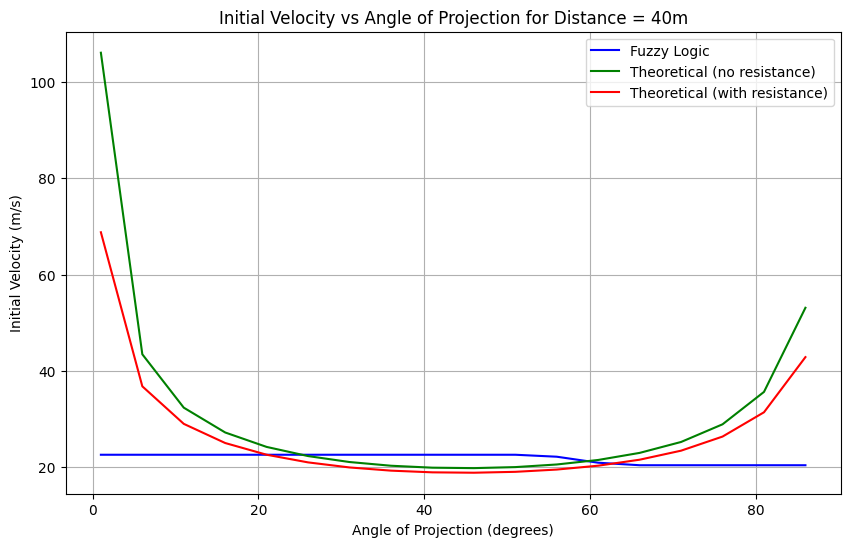

In [119]:

# Przykładowe dane wejściowe
angles = np.arange(1, 91, 5)
distance = 40  # analizowana odległość
air_resistance = 0.2
mass = 70

# Przygotowanie list do przechowywania wyników
fuzzy_velocities = []
no_resistance_velocities = []
resistance_velocities = []

# Symulacja logiki rozmytej oraz wzorów teoretycznych dla różnych kątów rzutu
for angle in angles:
    # Logika rozmyta
    velocity_estimate.input['kąt rzutu'] = angle
    velocity_estimate.input['zasięg rzutu'] = distance
    velocity_estimate.input['współczynnik oporu powietrza'] = air_resistance
    velocity_estimate.input['masa ciała'] = mass
    velocity_estimate.compute()
    fuzzy_velocities.append(velocity_estimate.output['prędkość początkowa'])
    
    # Teoretyczna prędkość bez oporu powietrza
    no_resistance_velocities.append(predkosc_poczatkowa_bez_oporu(angle, distance))
    
    # Teoretyczna prędkość z oporem powietrza
    resistance_velocities.append(predkosc_poczatkowa_z_oporem(angle, distance, air_resistance, mass))

# Wykres porównujący
plt.figure(figsize=(10, 6))
plt.plot(angles, fuzzy_velocities, label='Fuzzy Logic', color='blue')
plt.plot(angles, no_resistance_velocities, label='Theoretical (no resistance)', color='green')
plt.plot(angles, resistance_velocities, label='Theoretical (with resistance)', color='red')
plt.title('Initial Velocity vs Angle of Projection for Distance = 40m')
plt.xlabel('Angle of Projection (degrees)')
plt.ylabel('Initial Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.show()